## <center>Epic Games would like to know if certain video game characteristic correlate to how many units that game will sell.</center>

> **H0:** Certain video game characteristics **can not** be used to predict how how many units it will sell.<br>
> **H1:** Certain video game characteristics can be used to predict how how many units it will sell.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
%matplotlib inline

In [88]:
# Reading in the data set.
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

# <center>Exploring</center>

In [89]:
# Verifying it loaded.
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Making a copy of the dataframe to clean the data set.
df_copy = df.copy()

In [91]:
# Exploring the data set.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [92]:
# Exploring the platforms available.
df_copy.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# <center>Cleaning</center>

In [93]:
# Displaying all the columns.
df_copy.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [94]:
# Removing some of the unneeded columns.
df_copy = df_copy.drop(columns=['Publisher', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
            'User_Score', 'User_Count', 'Developer', 'Rating'])

In [95]:
# Verifying columns were deleted.
df_copy.head()

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22


#### <center>Removed some uneeded columns to simplify the data set.</center>

In [96]:
# Displaying the platforms available.
df_copy.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [97]:
# Removing platforms that Epic Game does not support.
df_copy = df_copy[~df_copy['Platform'].isin(['NES', 'GB', 'X360', 'PS3', 'PS2', 'SNES',
                                             'GBA', 'N64', 'PS','XB', '2600', 'GEN', 'DC', 'PSV', 'SAT',
                                             'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'])]

In [98]:
# Confirming supported platforms.
df_copy.Platform.unique()

array(['Wii', 'DS', 'PS4', '3DS', 'PC', 'PSP', 'XOne', 'WiiU', 'GC'],
      dtype=object)

#### <center>Removed the video game platforms that Epic Games doesn't support.</center>

In [99]:
# Displaying all genres.
df_copy.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Action',
       'Strategy', 'Adventure'], dtype=object)

In [100]:
# Removing unneeded game genre 'Platform'.
df_copy = df_copy[df_copy.Genre != 'Platform']

In [101]:
# Removing undeeded game genre 'Misc'.
df_copy = df_copy[df_copy.Genre != 'Misc']

In [102]:
# Verifying the two genres were removed.
df_copy.Genre.unique()

array(['Sports', 'Racing', 'Simulation', 'Role-Playing', 'Puzzle',
       'Shooter', 'Fighting', 'Action', 'Strategy', 'Adventure'],
      dtype=object)

#### <center>Removed two video game genres that don't help this analysis.</center>

In [103]:
# Counting how many NA_Sales rows have no sales data.
df_copy[df_copy.NA_Sales == 0].shape[0]

2053

In [104]:
# Counting how many EU_Sales rows have no sales data.
df_copy[df_copy.EU_Sales == 0].shape[0]

2759

In [105]:
# Counting how many JP_Sales rows have no sales data.
df_copy[df_copy.JP_Sales == 0].shape[0]

4096

In [106]:
# Removing rows with NA_Sales entries of 0.
df_copy = df_copy[df_copy.NA_Sales != 0]

In [107]:
# Removing rows with EU_Sales entries of 0.
df_copy = df_copy[df_copy.EU_Sales != 0]

In [108]:
# Removing rows with JP_Sales entries of 0.
df_copy = df_copy[df_copy.JP_Sales != 0]

In [109]:
# Verifying all NA_Sales have sales data.
df_copy[df_copy.NA_Sales == 0].shape[0]

0

In [110]:
# Verifying all EU_Sales have sales data.
df_copy[df_copy.EU_Sales == 0].shape[0]

0

In [111]:
# Verifying all JP_Sales have sales data.
df_copy[df_copy.JP_Sales == 0].shape[0]

0

#### <center>Removed rows on the three sales columns that contain no sales.</center>

In [112]:
# Displaying the new data frame.
df_copy.head()

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13


# <center>Analyzing</center>

In [113]:
# Creating a NA_Sales variable for plotting.
na_sum = df_copy['NA_Sales'].sum()

In [114]:
# Creating a EU_Sales variable for plotting.
eu_sum = df_copy['EU_Sales'].sum()

In [115]:
# Creating a JP_Sales variable for plotting.
jp_sum = df_copy['JP_Sales'].sum()

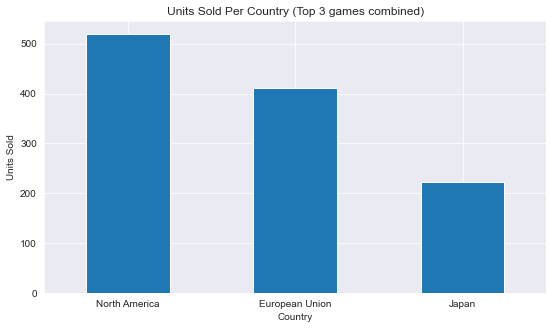

In [116]:
# Plotting units sold per country for visualizing the finding.
sales_df = pd.DataFrame({'Country':['North America', 'European Union', 'Japan'], 'Units Sold':[na_sum, eu_sum, jp_sum]})
sns.set_style("darkgrid")
sales_bar = sales_df.plot.bar(x='Country', y='Units Sold', rot=0, legend=False, figsize=(9,5))

plt.title('Units Sold Per Country (Top 3 games combined)')
plt.xlabel('Country')
plt.ylabel("Units Sold")
plt.show()

#### <center>Looking at the chart above we can see North America sells more units than the European Union and far more than Japan. Seeing that Epic Games is based in the United States, it will be the market I recommend releasing the new video game in. With that said, moving forward I'll only analyze North American video game characteristics.</center>

In [117]:
# Creating a new data frame of top 200 games ordered by decending NA_Sales.
sales_sorted = df_copy.sort_values('NA_Sales', ascending=False).head(200)
sales_sorted.head()

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93


In [118]:
# Looking for the top 3 appearing genres that are in the top 200 games.
sales_sorted.Genre.value_counts()

Action          46
Role-Playing    35
Shooter         35
Sports          29
Simulation      19
Racing          14
Puzzle          12
Fighting         6
Adventure        2
Strategy         2
Name: Genre, dtype: int64

In [119]:
# Looking for the top 3 appearing platforms that are in the top 200 games.
sales_sorted.Platform.value_counts()

PS4     45
DS      44
Wii     34
GC      29
3DS     18
XOne    14
PSP     10
WiiU     5
PC       1
Name: Platform, dtype: int64

#### <center>First I sorted the data set by NA_Sales. Then I found the top 3 game genres and platforms based on how many times they appeared in the top 200.</center>

> **Genres:** Action, Role-Playing, Shooter<br>
> **Platforms:** PS4, DS, Wii

In [120]:
# Created variables to make a new data frame.
Action = sales_sorted[sales_sorted['Genre'] == 'Action'].head(25).NA_Sales.tolist()
Role_Playing = sales_sorted[sales_sorted['Genre'] == 'Role-Playing'].head(25).NA_Sales.tolist()
Shooter = sales_sorted[sales_sorted['Genre'] == 'Shooter'].head(25).NA_Sales.tolist()
PS4 = sales_sorted[sales_sorted['Platform'] == 'PS4'].head(25).NA_Sales.tolist()
DS = sales_sorted[sales_sorted['Platform'] == 'DS'].head(25).NA_Sales.tolist()
Wii = sales_sorted[sales_sorted['Platform'] == 'Wii'].head(25).NA_Sales.tolist()
NA_Units = sales_sorted.NA_Sales.head(25)

In [121]:
# Creating a data frame with all the needed data.
new_df = pd.DataFrame(
    {
     'Action': Action,
     'Role_Playing': Role_Playing,
     'Shooter': Shooter,
     'PS4' : PS4,
     'DS' : DS,
     'Wii' : Wii,
     'NA_Units' : NA_Units
    })

new_df.head(25)

,Action,Role_Playing,Shooter,PS4,DS,Wii,NA_Units
0,4.34,6.38,6.03,6.03,9.71,41.36,41.36
2,3.96,5.51,4.59,3.96,9.05,15.68,15.68
3,3.74,5.28,3.22,2.99,6.38,15.61,15.61
11,2.90,4.35,3.05,2.81,5.51,9.01,9.71
10,2.60,2.98,2.99,2.53,4.34,8.92,9.05
15,2.38,2.79,2.81,2.49,3.43,6.62,9.01
13,2.09,2.76,2.78,2.49,3.07,3.74,8.92
39,2.07,2.53,2.49,2.07,2.79,3.05,6.62
20,2.03,2.51,2.28,1.88,2.76,2.57,6.38
31,1.88,2.23,2.04,1.85,2.50,2.09,6.03


In [122]:
# Preforming a Two-way ANOVA test.
mod = ols('NA_Units~Action+Role_Playing+Shooter+PS4+DS+Wii', data = new_df).fit()
aov = sm.stats.anova_lm(mod, type=2)
print(aov)



                df       sum_sq      mean_sq            F        PR(>F)
Action         1.0  1076.261447  1076.261447  2720.042447  4.266332e-21
Role_Playing   1.0     1.939720     1.939720     4.902267  3.996780e-02
Shooter        1.0   153.765741   153.765741   388.613142  1.235737e-13
PS4            1.0   204.310079   204.310079   516.354172  1.051844e-14
DS             1.0     5.538038     5.538038    13.996318  1.495083e-03
Wii            1.0    28.131543    28.131543    71.097029  1.149779e-07
Residual      18.0     7.122207     0.395678          NaN           NaN


### Two-way ANOVA Test Results


> **<u>P_values</u>**
> * **Action:** 4.266332e-21
> * **Role_Playing:** 3.996780e-02
> * **Shooter:** 1.235737e-13
> * **PS4:** 1.051844e-14
> * **DS:** 1.495083e-03
> * **Wii:** 1.149779e-07

## <center>Conclusion</center>
> It's clear that North America sells more video games than The European Union and Japan. With Epic Games being in North America and North Americas sales history, it'll be my recommendation that the next video game should be released in North America.

> I was able to isolate the top preforming video games based off units sold. From there I found the top 3 game genres and top 3 platforms that appeared the most in the top 200 games. I then took the top 25 performers per genre/platform and put them in a data frame. From there I ran my two-way ANOVA test on the data to obtain my p-values. All 6 of my independent variables (genres/platforms) had a much smaller p-value than my threshold of 5%.

> So, with **all 6 p-values < 0.05**, I can reject my null hypothesis.<br>
>Null: Certain video game characteristics **can not** be used to predict how how many units it will sell.